In [34]:
# load packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score

In [65]:
# import the data
train = pd.read_csv('train.csv')
train


,id,request_date,pickup_city,destination_city,accepted_date,started_date,rider,driver,trip_distance,driver2rider_distance,used_discount,trip_status,trip_finished_date,rider_rating,driver_rating,rider_cancel_reason,driver_cancel_reason,discount_amount,trip_fee
0,LVwq2xeA5mMt,2021-01-30 14:06:19.94,Constantine,Constantine,2021-01-30 14:07:04.707,NaN,E1B3rg1jOiBF,DVwusPupJeU4,16035,1927,0,NOT_FINISHED,NaN,NaN,NaN,NaN,NaN,NaN,511
1,U9CuIIRyArx0,2021-05-18 07:54:39.922,Alger,Alger,2021-05-18 07:55:05.362,2021-05-18 08:03:23.664,u7zilHWibXpk,Mv2dXvQt5e5i,12031,1884,0,FINISHED,2021-05-18 08:32:03.611,4.0,5.0,NaN,NaN,NaN,579
2,ke1gwcPZ93Nl,2021-03-05 13:17:24.999,Oran,Oran,NaN,NaN,NmumknIUfHYy,yOf6NbYVTVAl,16812,994,0,NOT_FINISHED,NaN,NaN,NaN,NaN,NaN,NaN,706
3,djk2iJ9DxEsC,2021-02-24 14:08:57.592,Alger,Alger,2021-02-24 14:09:35.139,2021-02-24 14:15:15.67,lM2VjdqUB1Eb,L0b1fBxbKELj,6759,1037,0,FINISHED,2021-02-24 14:19:18.31,5.0,5.0,NaN,NaN,NaN,343
4,FmVbgMcD4a5r,2021-03-08 09:14:24.922,Alger,Alger,2021-03-08 09:14:58.244,2021-03-08 09:49:02.868,xe9ExnoJcI9a,VNJpNZpa9A1Q,11628,1174,1,FINISHED,2021-03-08 09:49:04.071,5.0,5.0,UNDEFINED,UNDEFINED,500.0,517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723401,J6DlD8LlKuyk,2021-03-08 12:31:20.06,Alger,Alger,NaN,NaN,1NN9IlQ87wWN,yOf6NbYVTVAl,15535,2227,0,NOT_FINISHED,NaN,NaN,NaN,NaN,NaN,NaN,714
723402,WMIqrgn6LaPf,2021-01-12 14:51:24.67,Alger,Alger,2021-01-12 14:52:23.756,2021-01-12 15:09:46.859,T50lRf8zPnvy,a7MiKNRXGjZp,11023,940,0,FINISHED,2021-01-12 15:09:48.569,5.0,4.0,NaN,NaN,NaN,418
723403,bR0QC0MG2Mmr,2021-03-10 09:30:44.745,Alger,Alger,2021-03-10 09:32:15.915,2021-03-10 09:56:32.52,TOwqRk6ppWv8,Ro2T1UPf92u1,2736,410,1,FINISHED,2021-03-10 09:56:33.988,2.0,5.0,NaN,NaN,NaN,250
723404,hStUZglOY79I,2021-02-11 07:48:25.722,Alger,Alger,2021-02-11 07:49:35.707,2021-02-11 07:54:33.542,XyCbvjSr7Tbr,7koHXKMSBb3m,10560,1123,0,FINISHED,2021-02-11 08:09:04.654,5.0,5.0,NaN,NaN,NaN,416


In [66]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
trip_distance,723406.0,18552.295020,87482.333145,1.0,5165.0,9378.0,16367.75,2459687.0
driver2rider_distance,723406.0,1564.942180,3770.986991,1.0,753.0,1148.0,1698.00,114320.0
used_discount,723406.0,0.199342,0.399506,0.0,0.0,0.0,0.00,1.0
rider_rating,324687.0,4.443021,1.096727,1.0,4.0,5.0,5.00,5.0
driver_rating,330561.0,4.585659,0.993293,1.0,5.0,5.0,5.00,5.0
discount_amount,51593.0,7723.609773,54065.647310,500.0,500.0,500.0,9999.00,1000000.0
trip_fee,723406.0,702.815060,2492.715292,16.0,313.0,451.0,660.00,179275.0


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723406 entries, 0 to 723405
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     723406 non-null  object 
 1   request_date           723406 non-null  object 
 2   pickup_city            723406 non-null  object 
 3   destination_city       723406 non-null  object 
 4   accepted_date          485049 non-null  object 
 5   started_date           332222 non-null  object 
 6   rider                  723406 non-null  object 
 7   driver                 723406 non-null  object 
 8   trip_distance          723406 non-null  int64  
 9   driver2rider_distance  723406 non-null  int64  
 10  used_discount          723406 non-null  int64  
 11  trip_status            723406 non-null  object 
 12  trip_finished_date     335478 non-null  object 
 13  rider_rating           324687 non-null  float64
 14  driver_rating          330561 non-nu

In [69]:
train.nunique()

id                       723406
request_date             723351
pickup_city                  43
destination_city             48
accepted_date            485024
started_date             332200
rider                    192219
driver                    12558
trip_distance             57721
driver2rider_distance     12057
used_discount                 2
trip_status                   2
trip_finished_date       335461
rider_rating                  5
driver_rating                 5
rider_cancel_reason           6
driver_cancel_reason          5
discount_amount              13
trip_fee                   8097
dtype: int64

In [70]:
train.isnull().sum()

id                            0
request_date                  0
pickup_city                   0
destination_city              0
accepted_date            238357
started_date             391184
rider                         0
driver                        0
trip_distance                 0
driver2rider_distance         0
used_discount                 0
trip_status                   0
trip_finished_date       387928
rider_rating             398719
driver_rating            392845
rider_cancel_reason      713359
driver_cancel_reason     713359
discount_amount          671813
trip_fee                      0
dtype: int64

# visualization

C:\Users\ce pc\anaconda3\envs\tens\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


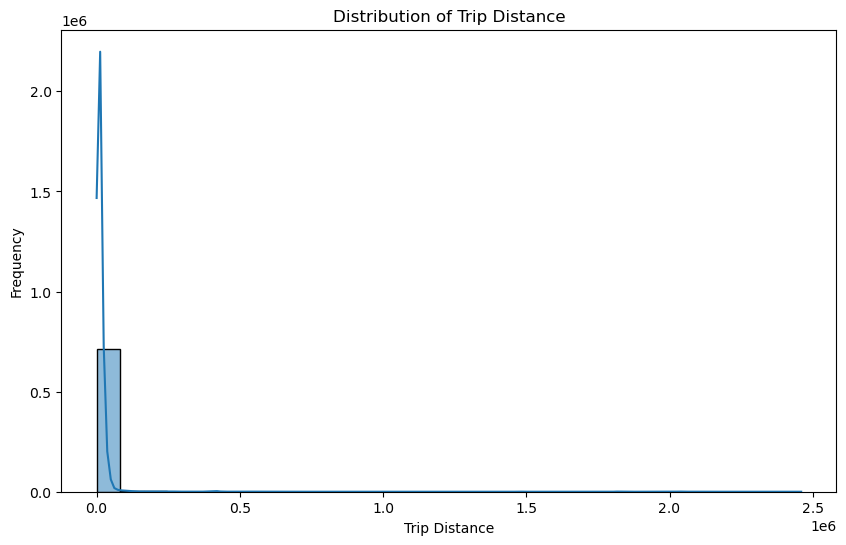

In [52]:
# Histogram of Trip Distance
plt.figure(figsize=(10, 6))
sns.histplot(train['trip_distance'], bins=30, kde=True)
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distance')
plt.show()

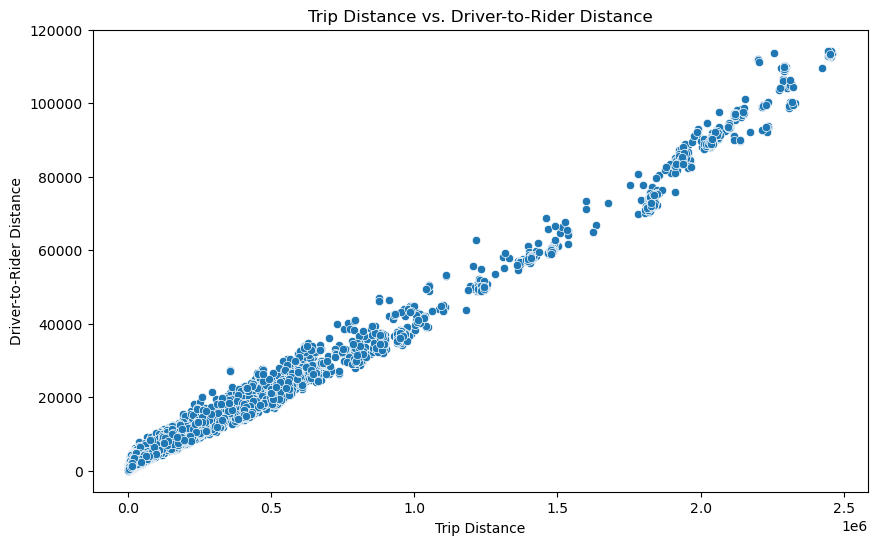

In [53]:
# Scatter Plot of Trip Distance vs. Driver-to-Rider Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='driver2rider_distance', data=train)
plt.xlabel('Trip Distance')
plt.ylabel('Driver-to-Rider Distance')
plt.title('Trip Distance vs. Driver-to-Rider Distance')
plt.show()

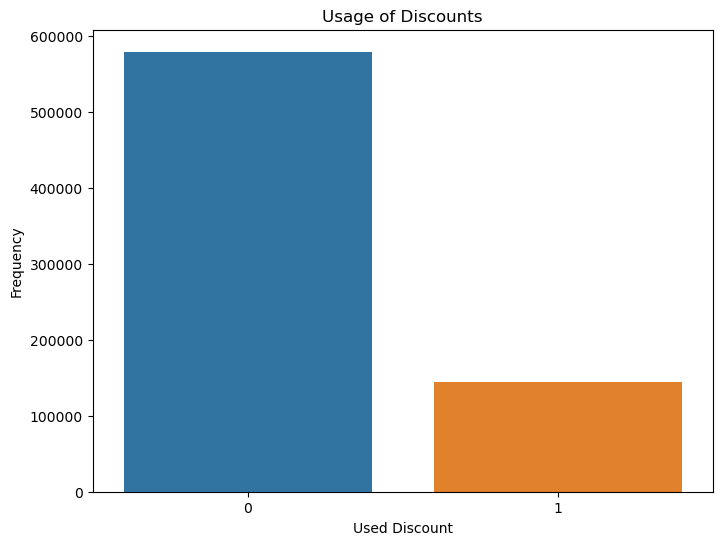

In [54]:
# Bar Chart of Used Discount
plt.figure(figsize=(8, 6))
sns.countplot(x='used_discount', data=train)
plt.xlabel('Used Discount')
plt.ylabel('Frequency')
plt.title('Usage of Discounts')
plt.show()

getting the day of each request

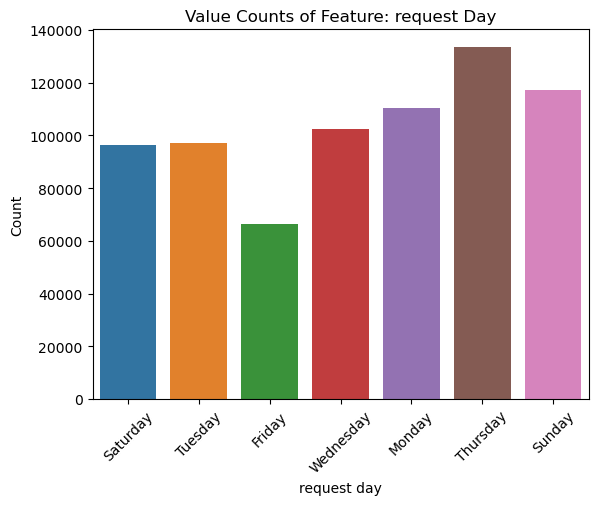

In [73]:
import pandas as pd

# Convert 'request_date' to datetime format
train['request_date'] = pd.to_datetime(train['request_date'], format='mixed')

# Extract the day name from the 'request_date' column
train['request_day'] = train['request_date'].dt.strftime('%A')

# Now you can plot the count of trips per day
sns.countplot(x=train['request_day'])
plt.title("Value Counts of Feature: request Day")
plt.xlabel("request day")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


C:\Users\ce pc\anaconda3\envs\tens\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ce pc\anaconda3\envs\tens\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


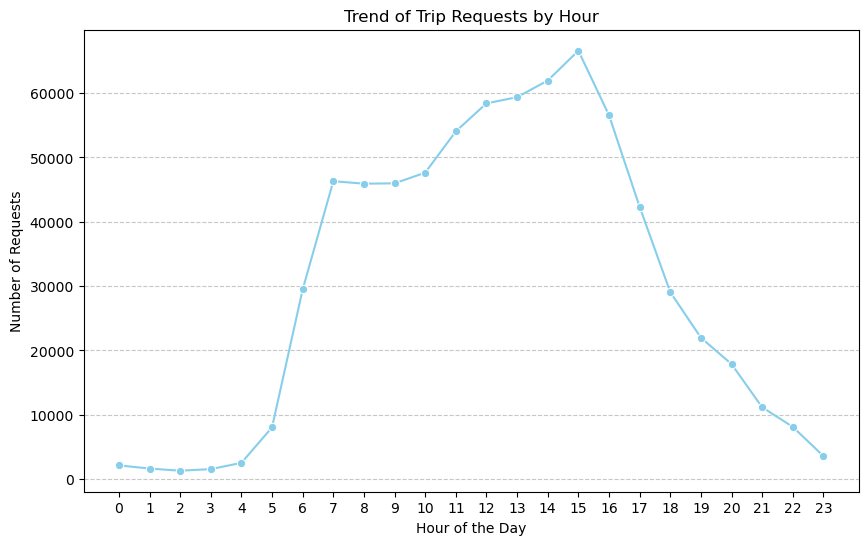

In [85]:
# Plotting a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=train['hour'].value_counts().sort_index(), marker='o', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.title('Trend of Trip Requests by Hour')
plt.xticks(range(24))  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

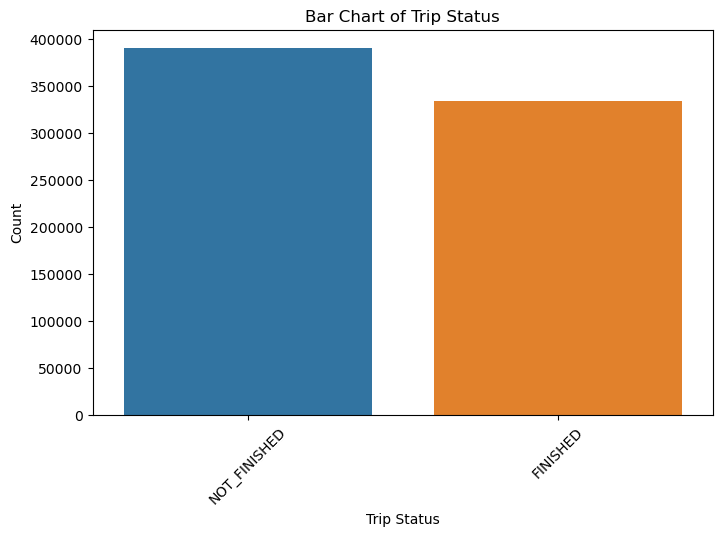

In [87]:
# Bar Chart of Trip Status
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='trip_status')
plt.title('Bar Chart of Trip Status')
plt.xlabel('Trip Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

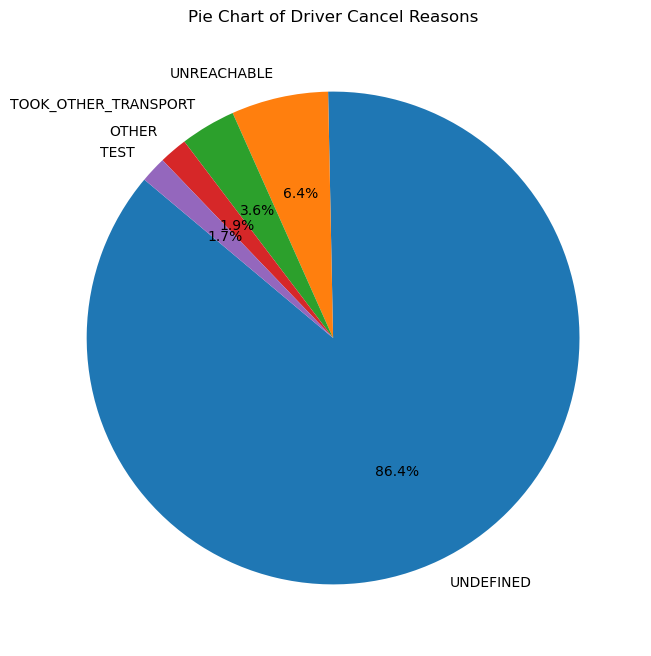

In [90]:
# Pie Chart of Driver Cancel Reasons
plt.figure(figsize=(8, 8))
train['driver_cancel_reason'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Driver Cancel Reasons')
plt.ylabel('')
plt.show()

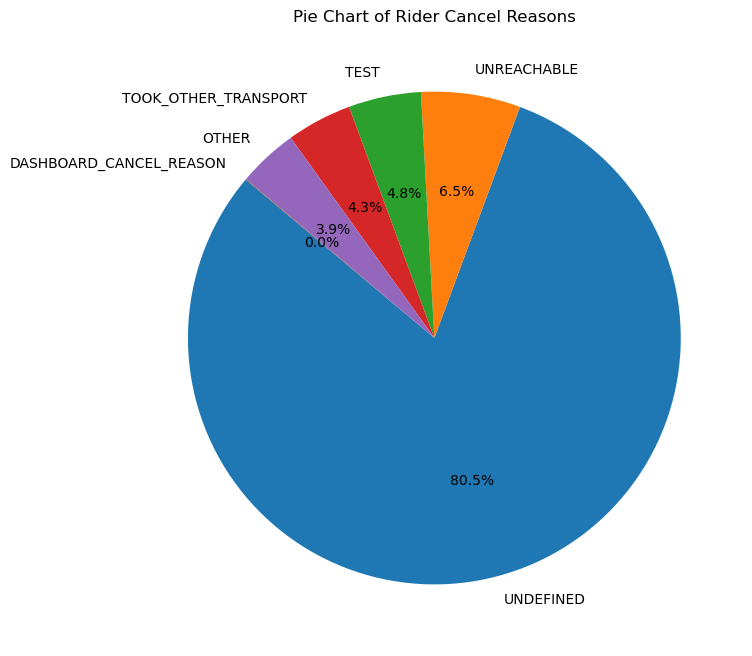

In [91]:
# Pie Chart of Rider Cancel Reasons
plt.figure(figsize=(8, 8))
train['rider_cancel_reason'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Rider Cancel Reasons')
plt.ylabel('')
plt.show()

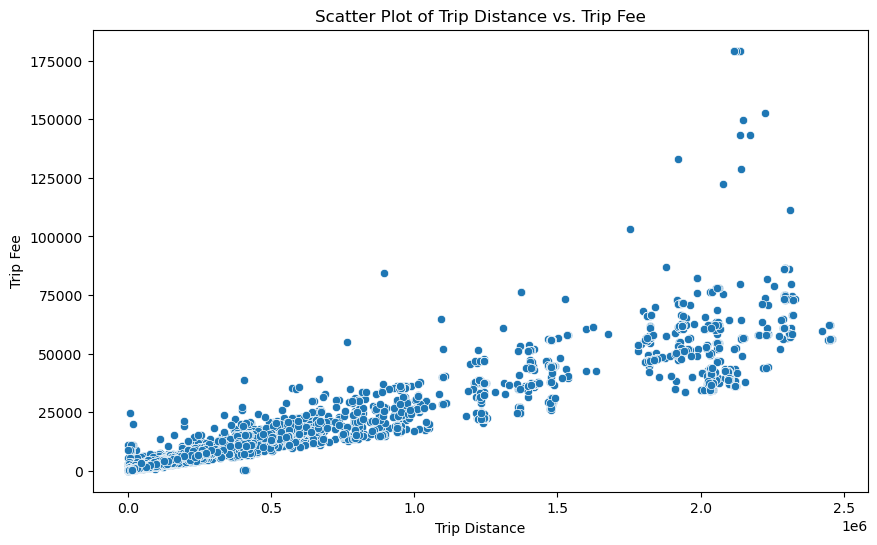

In [92]:
# Scatter Plot of Trip Distance vs. Trip Fee
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='trip_distance', y='trip_fee')
plt.title('Scatter Plot of Trip Distance vs. Trip Fee')
plt.xlabel('Trip Distance')
plt.ylabel('Trip Fee')
plt.show()

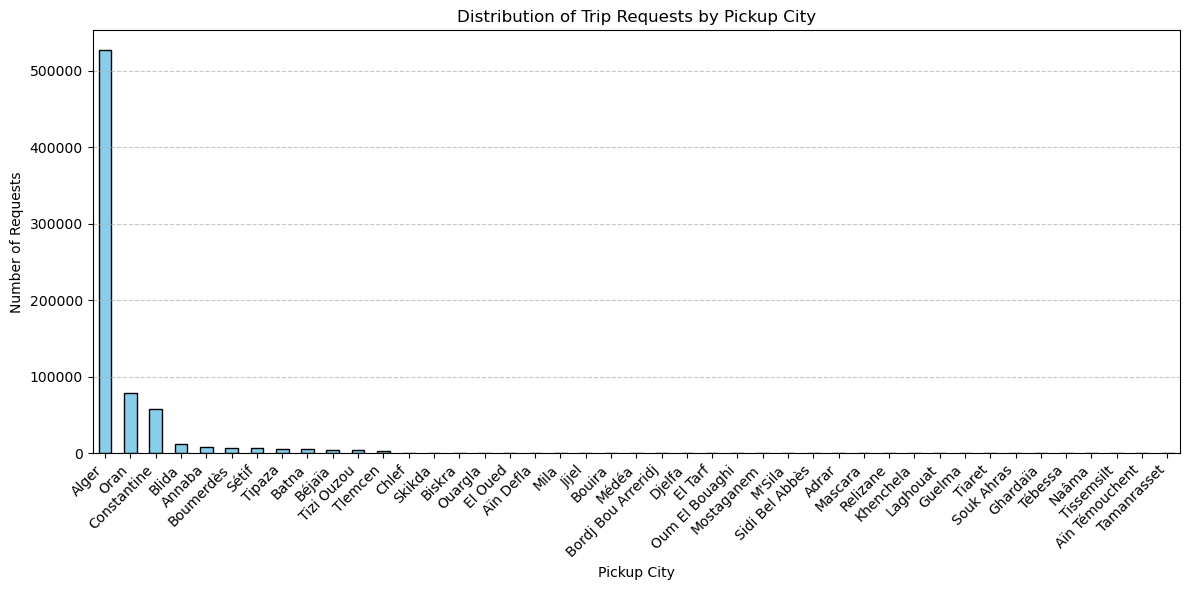

In [93]:

# Plotting a bar plot for pickup cities
plt.figure(figsize=(12, 6))
train['pickup_city'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Pickup City')
plt.ylabel('Number of Requests')
plt.title('Distribution of Trip Requests by Pickup City')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [94]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

C:\Users\ce pc\anaconda3\envs\tens\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ce pc\anaconda3\envs\tens\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ce pc\anaconda3\envs\tens\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ce pc\anaconda3\envs\tens\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

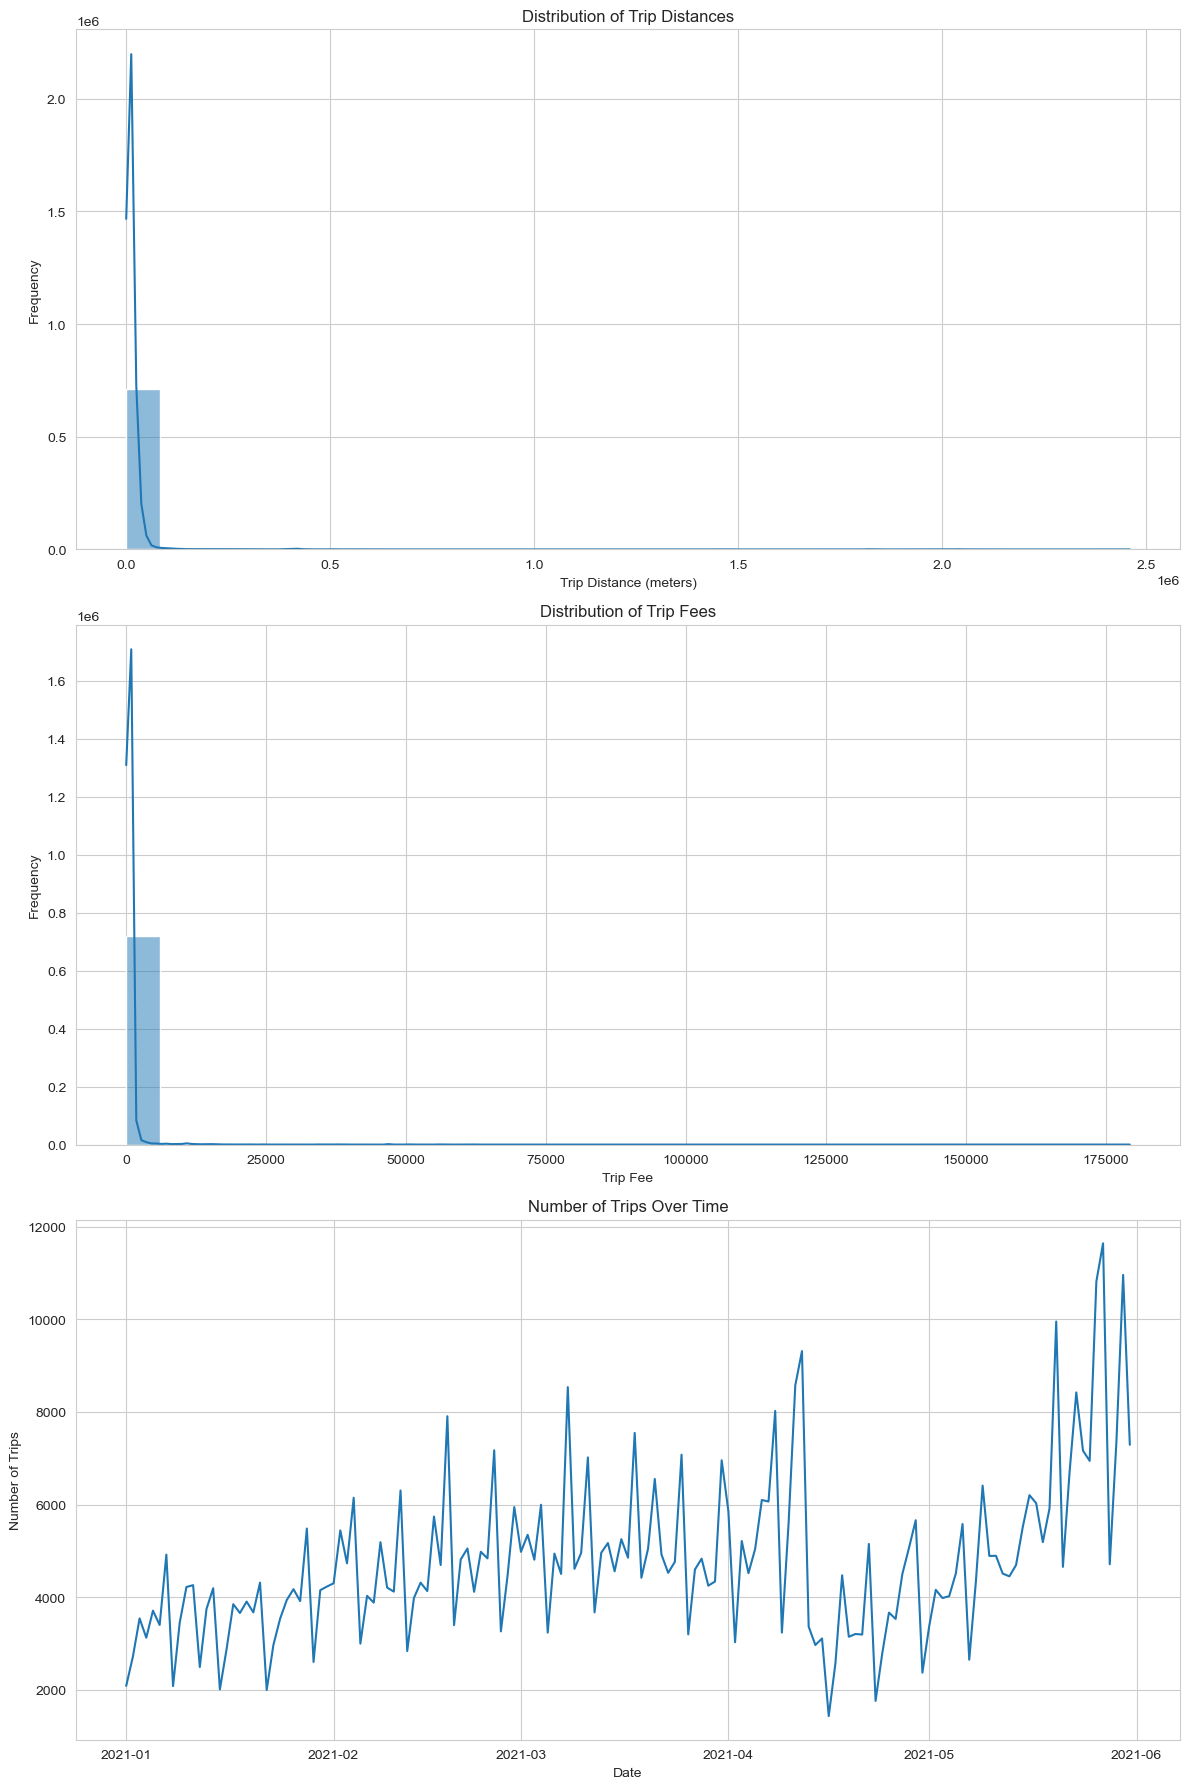

In [98]:
# Creating the plots
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Distribution of Trip Distances
sns.histplot(train['trip_distance'], bins=30, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Trip Distances')
ax[0].set_xlabel('Trip Distance (meters)')
ax[0].set_ylabel('Frequency')

# Trip Fee Distribution
sns.histplot(train['trip_fee'], bins=30, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Trip Fees')
ax[1].set_xlabel('Trip Fee')
ax[1].set_ylabel('Frequency')

# Trips Over Time
# Convert request_date to datetime
train['request_date'] = pd.to_datetime(train['request_date'])
# Resampling to get daily counts
daily_trips = train.resample('D', on='request_date').size()
sns.lineplot(x=daily_trips.index, y=daily_trips.values, ax=ax[2])
ax[2].set_title('Number of Trips Over Time')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Number of Trips')

plt.tight_layout()
plt.show()

For the analysis, I'll start with a combination of geographical and behavioral segmentation, focusing on pickup_city, destination_city, and used_discount as initial criteria. Let's proceed with the segmentation

In [106]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame

# Combine all unique city names from both columns into a single Series
all_cities = pd.concat([train['pickup_city'], train['destination_city']]).unique()

# Initialize the encoder
encoder = LabelEncoder()

# Fit the encoder on all unique cities
encoder.fit(all_cities)

# Transform both columns using the fitted encoder
train['pickup_city_encoded'] = encoder.transform(train['pickup_city'])
train['destination_city_encoded'] = encoder.transform(train['destination_city'])


In [110]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Assuming 'train' is your DataFrame and has been loaded correctly

# Combine all unique cities from both pickup and destination into one Series
all_cities = pd.concat([train['pickup_city'], train['destination_city']]).unique()

# Initialize the LabelEncoder
le_city = LabelEncoder()

# Fit the encoder on all unique cities
le_city.fit(all_cities)

# Now transform both pickup and destination city columns using the fitted encoder
train['pickup_city_encoded'] = le_city.transform(train['pickup_city'])
train['destination_city_encoded'] = le_city.transform(train['destination_city'])

# Proceed with your feature selection and scaling
features = train[['pickup_city_encoded', 'destination_city_encoded', 'used_discount']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
train['segment'] = kmeans.fit_predict(features_scaled)

# Check the size of each segment
segment_size = train['segment'].value_counts().reset_index()
segment_size.columns = ['Segment', 'Size']
segment_size


C:\Users\ce pc\anaconda3\envs\tens\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Segment,Size
0,0,431807
1,2,131378
2,1,84587
3,3,62807
4,4,12827


In [111]:
# Combine pickup and destination cities into a single series to ensure all possible cities are included during encoding
all_cities = pd.concat([train['pickup_city'], train['destination_city']], axis=0).drop_duplicates().reset_index(drop=True)

# Re-fit the LabelEncoder with all possible cities
le_city.fit(all_cities)

# Transform both pickup and destination cities using the re-fitted encoder
train['pickup_city_encoded'] = le_city.transform(train['pickup_city'])
train['destination_city_encoded'] = le_city.transform(train['destination_city'])

# Re-apply the clustering with the corrected encoding
features = train[['pickup_city_encoded', 'destination_city_encoded', 'used_discount']]
features_scaled = scaler.fit_transform(features)  # Re-scale the features

# Re-apply KMeans clustering
train['segment'] = kmeans.fit_predict(features_scaled)

# Check the size of each segment again
segment_size_corrected = train['segment'].value_counts().reset_index()
segment_size_corrected.columns = ['Segment', 'Size']
segment_size_corrected


C:\Users\ce pc\anaconda3\envs\tens\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Segment,Size
0,0,431807
1,2,131378
2,1,84587
3,3,62807
4,4,12827


In [112]:
# Combine pickup and destination cities into a single series to ensure all possible cities are included during encoding
all_cities = pd.concat([train['pickup_city'], train['destination_city']], axis=0).drop_duplicates().reset_index(drop=True)

# Re-fit the LabelEncoder with all possible cities
le_city.fit(all_cities)

# Transform both pickup and destination cities using the re-fitted encoder
train['pickup_city_encoded'] = le_city.transform(train['pickup_city'])
train['destination_city_encoded'] = le_city.transform(train['destination_city'])

# Re-apply the clustering with the corrected encoding
features = train[['pickup_city_encoded', 'destination_city_encoded', 'used_discount']]
features_scaled = scaler.fit_transform(features)  # Re-scale the features

# Re-apply KMeans clustering
train['segment'] = kmeans.fit_predict(features_scaled)

# Check the size of each segment again
segment_size_corrected = train['segment'].value_counts().reset_index()
segment_size_corrected.columns = ['Segment', 'Size']
segment_size_corrected



C:\Users\ce pc\anaconda3\envs\tens\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Segment,Size
0,0,431807
1,2,131378
2,1,84587
3,3,62807
4,4,12827


C:\Users\ce pc\anaconda3\envs\tens\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ce pc\anaconda3\envs\tens\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ce pc\anaconda3\envs\tens\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ce pc\anaconda3\envs\tens\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

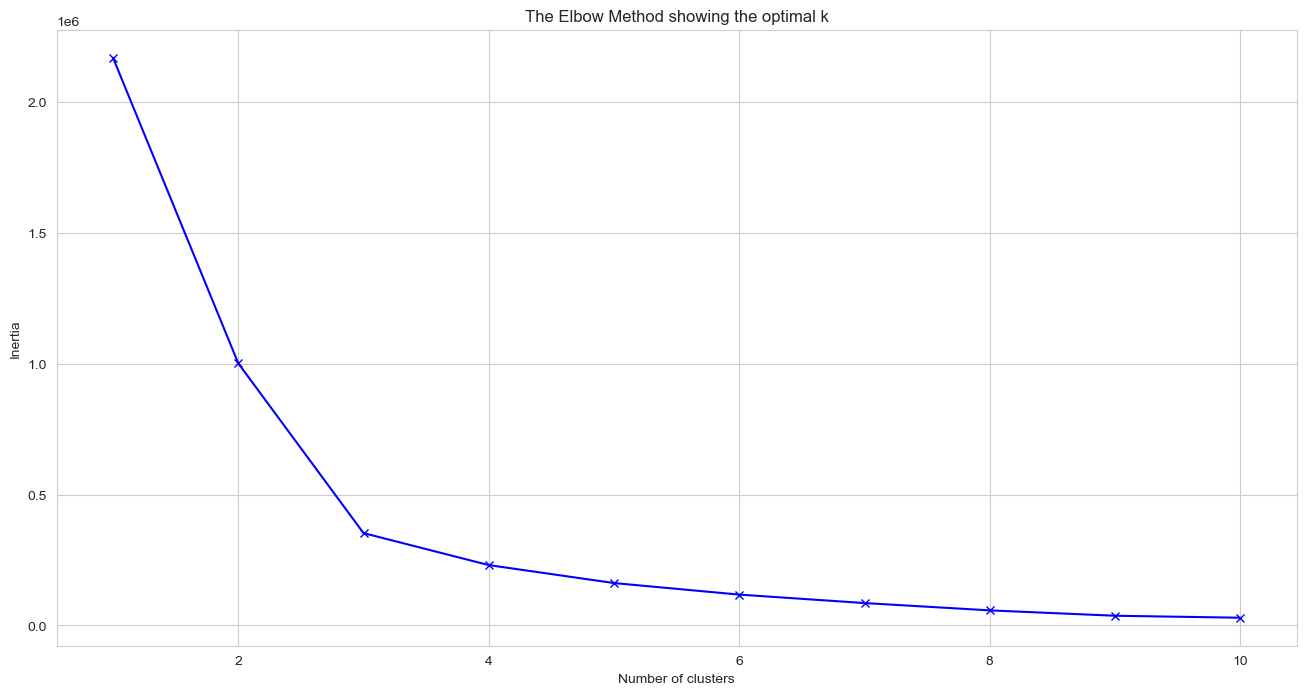

In [113]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using the scaled features for the elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(features_scaled)
    inertia.append(kmeanModel.inertia_)

# Plotting the Elbow
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Cluster 0: Customers who predominantly travel within major cities without using discounts. This group might represent regular commuters who value convenience.


Cluster 1: Customers who frequently use discounts, possibly indicating more price-sensitive individuals or those who use the service for occasional, non-urgent travel.


Cluster 2: A mix of intra-city and inter-city travelers who rarely use discounts, perhaps indicating business travelers or individuals for whom cost is a secondary consideration.


Cluster 3: Primarily inter-city travelers, possibly using discounts. This cluster might include individuals traveling for leisure or non-regular purposes, seeking cost-effective options.


Cluster 4: Customers with a diverse set of travel patterns but a common characteristic of frequently using discounts, indicating a highly price-sensitive segment possibly looking for the best deals.